In [19]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


%matplotlib inline

In [20]:
dataset = "../data/kidney_disease.csv"

df = pd.read_csv(dataset)
df.tail()
print(df.shape)


(400, 26)


In [21]:
df.drop('id', axis = 1, inplace = True)

In [22]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [23]:
# converting necessary columns to numerical type 
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [24]:
df.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [25]:
# make a replace for incorect value 

df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [26]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

In [27]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {df[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [28]:

cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [29]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



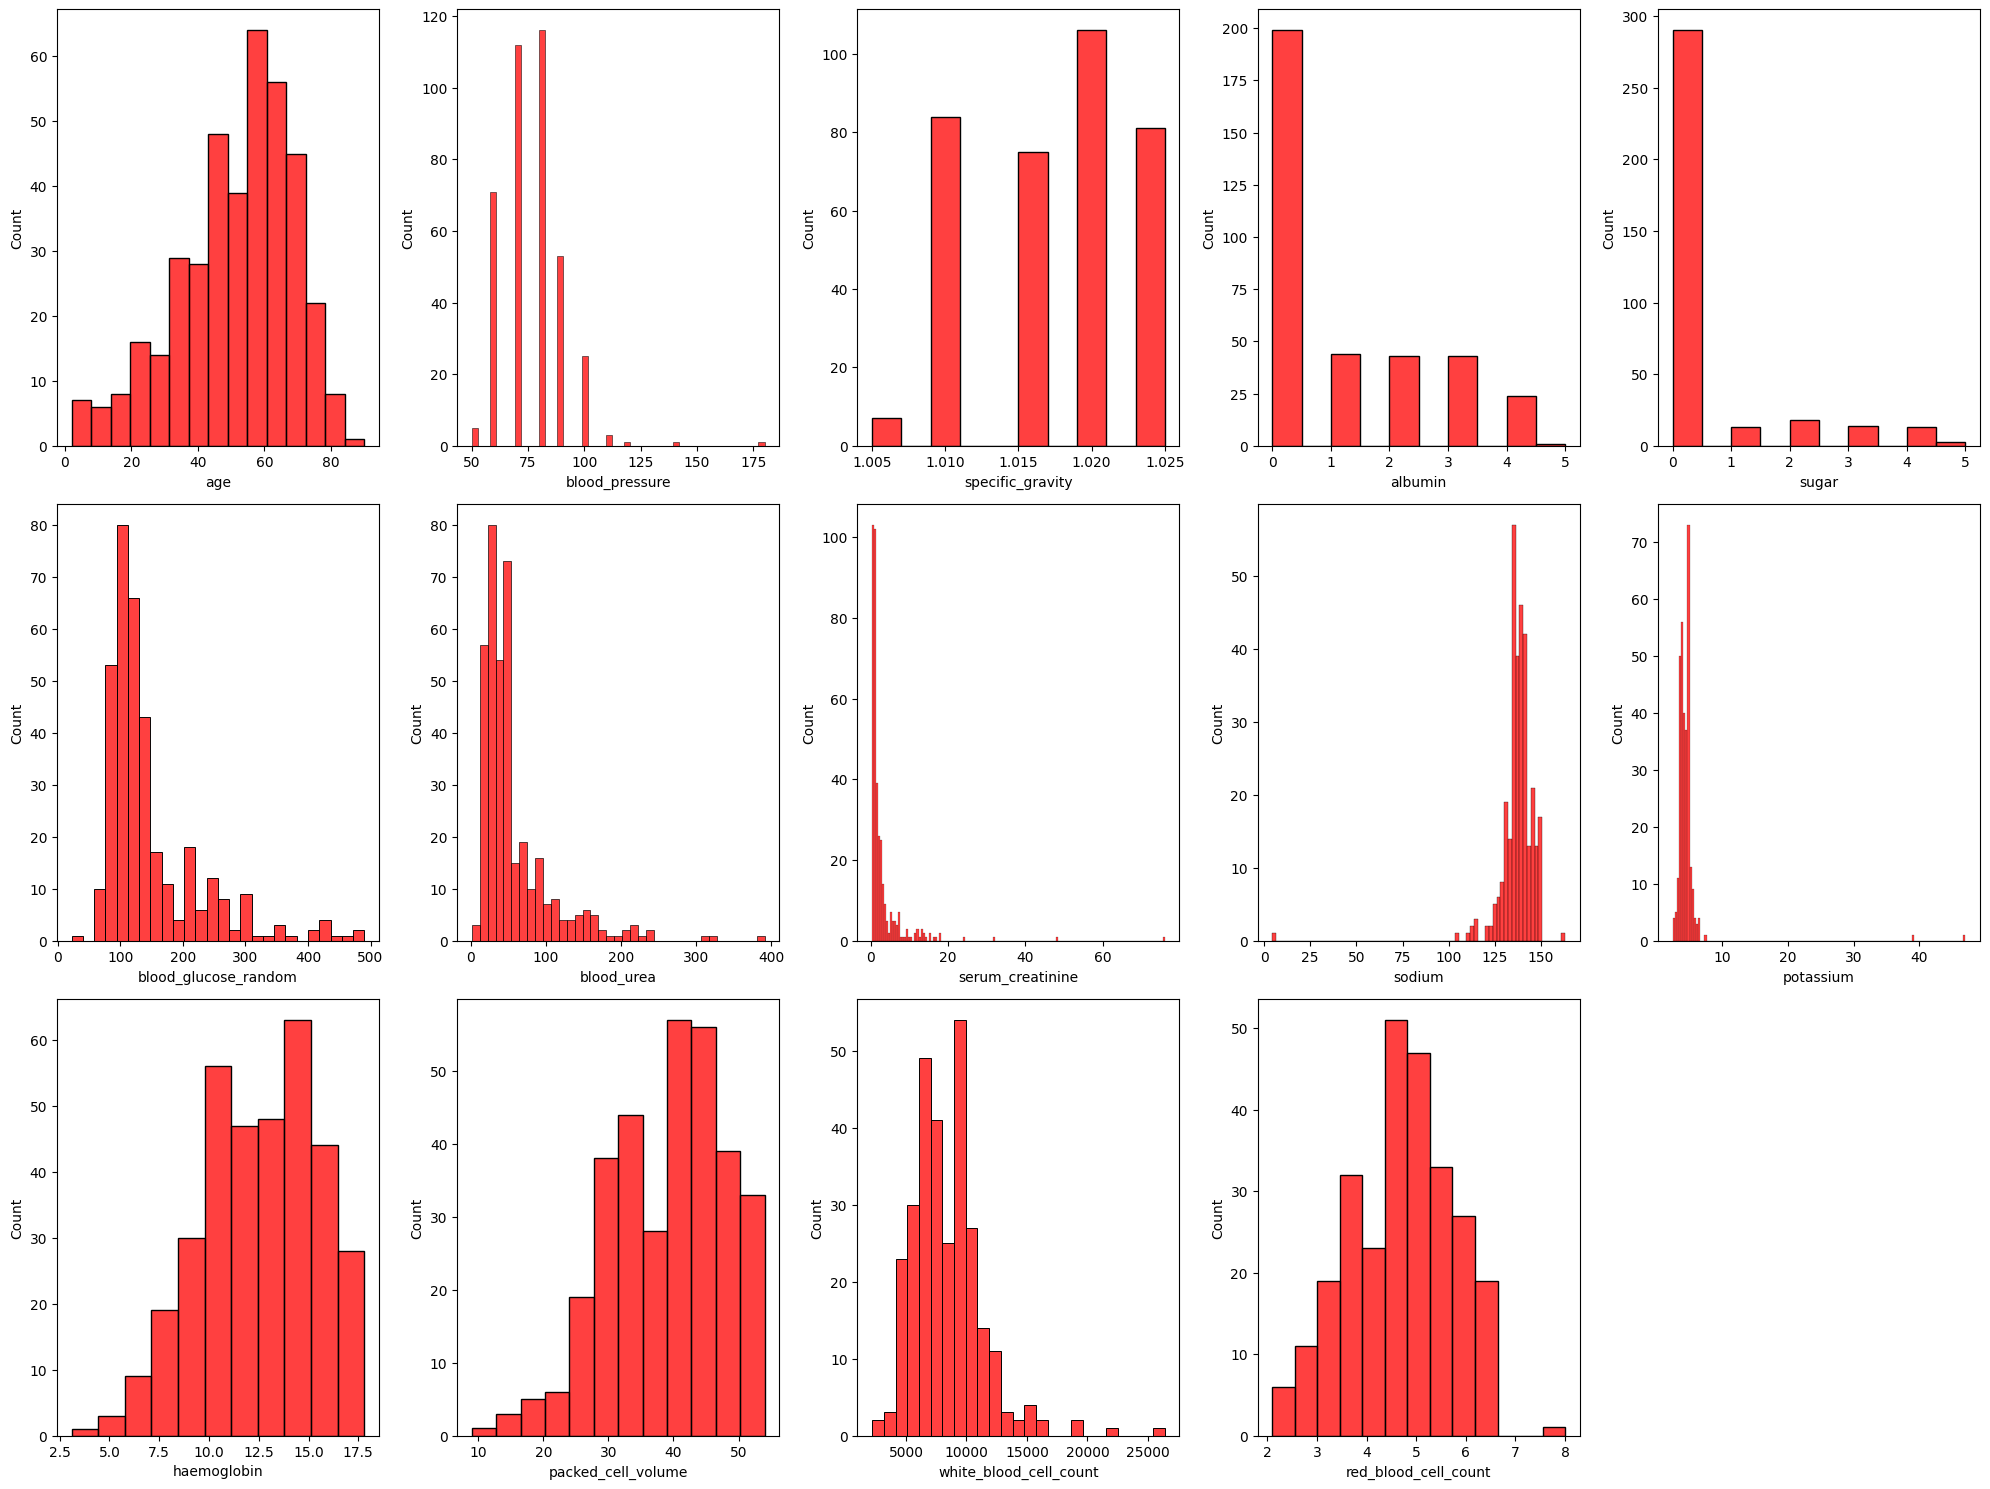

In [30]:
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.histplot(df[column],color='red',)
        plt.xlabel(column)
    plotnumber += 1

plt.tight_layout()
plt.show()

In [31]:
print(df.isnull().sum())

def meanFill(df, cols):
    for col in cols:
        df[col].fillna(df[col].mean(), inplace=True)
    return df

meanFill(df, num_cols)
df.isnull().sum()

# why is this not working?
df['red_blood_cells'].fillna(df['red_blood_cells'].mode()[0], inplace=True)
df['pus_cell'].fillna(df['pus_cell'].mode()[0], inplace=True)
df['pus_cell_clumps'].fillna(df['pus_cell_clumps'].mode()[0], inplace=True)
df['bacteria'].fillna(df['bacteria'].mode()[0], inplace=True)
df['appetite'].fillna(df['appetite'].mode()[0], inplace=True)
df['peda_edema'].fillna(df['peda_edema'].mode()[0], inplace=True)
df['aanemia'].fillna(df['aanemia'].mode()[0], inplace=True)
df['hypertension'].fillna(df['hypertension'].mode()[0], inplace=True)
df['diabetes_mellitus'].fillna(df['diabetes_mellitus'].mode()[0], inplace=True)
df['coronary_artery_disease'].fillna(df['coronary_artery_disease'].mode()[0], inplace=True)
df.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
haemoglobin                 52
packed_cell_volume          71
white_blood_cell_count     106
red_blood_cell_count       131
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64


age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
haemoglobin                0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
class                      0
dtype: int64

In [71]:
train, test = train_test_split(df, test_size=0.4)
train, validation = train_test_split(df, test_size=0.01)

print(f"Train set has {train.shape[0]} rows and {train.shape[1]} columns")
print(f"Test set has {test.shape[0]} rows and {test.shape[1]} columns")
print(f"Validation set has {validation.shape[0]} rows and {validation.shape[1]} columns")
test.head()


Train set has 396 rows and 25 columns
Test set has 160 rows and 25 columns
Validation set has 4 rows and 25 columns


,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
108,45.0,80.0,1.015000,0.000000,0.000000,normal,abnormal,notpresent,notpresent,107.000000,...,37.000000,10200.000000,4.200000,no,no,no,good,no,no,0
261,49.0,80.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,122.000000,...,41.000000,5600.000000,4.900000,no,no,no,good,no,no,1
59,59.0,100.0,1.017408,1.016949,0.450142,normal,normal,notpresent,notpresent,148.036517,...,38.884498,8406.122449,4.707435,yes,yes,no,good,no,yes,0
56,76.0,70.0,1.015000,3.000000,4.000000,normal,abnormal,present,notpresent,148.036517,...,30.000000,11300.000000,3.400000,yes,yes,yes,poor,yes,no,0
298,34.0,60.0,1.020000,0.000000,0.000000,normal,normal,notpresent,notpresent,91.000000,...,48.000000,8600.000000,4.900000,no,no,no,good,no,no,1


In [72]:
# convert categorical columns to numerical
le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])
    validation[col] = le.transform(validation[col])
    test[col] = le.transform(test[col])


# split data into features and target
X_train = train.drop('class', axis=1)
y_train = train['class']

X_test = test.drop('class', axis=1)
y_test = test['class']

X_validation = validation.drop('class', axis=1)
y_validation = validation['class']

# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_validation = scaler.transform(X_validation)


In [73]:
# create a function to run models
def run_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print()
    print(f"Classification Report: {classification_report(y_test, y_pred)}")
    print()
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, cmap='Greys')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

Model: LogisticRegression()
Accuracy: 1.0

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        60

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160




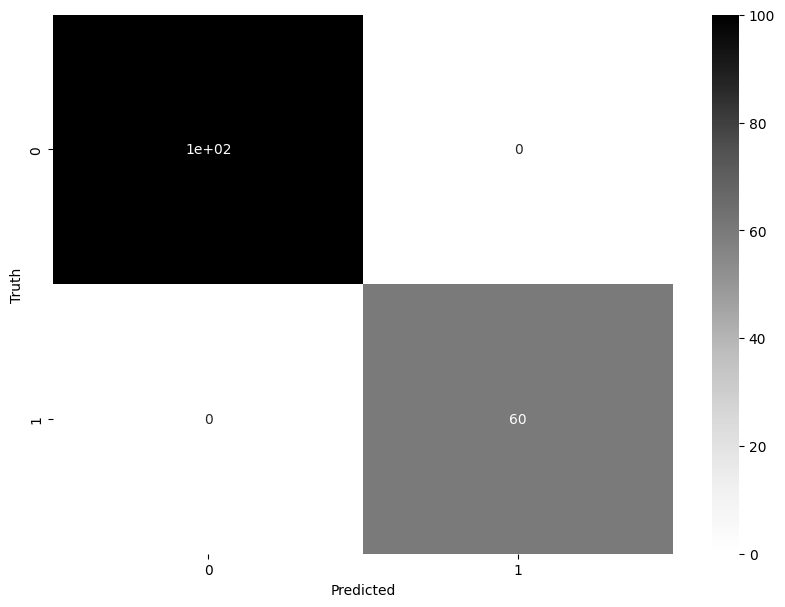

In [74]:
# run logistic regression
log_reg = LogisticRegression()
run_model(log_reg, X_train, y_train, X_test, y_test)

Model: RandomForestClassifier()
Accuracy: 1.0

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        60

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160




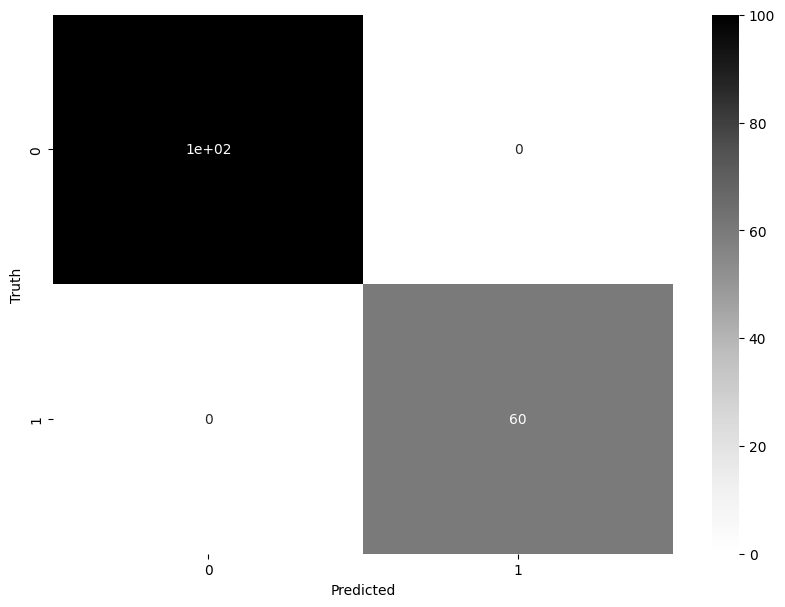

In [75]:
# run random forest
rf = RandomForestClassifier()
run_model(rf, X_train, y_train, X_test, y_test)

Model: DecisionTreeClassifier()
Accuracy: 1.0

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        60

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160




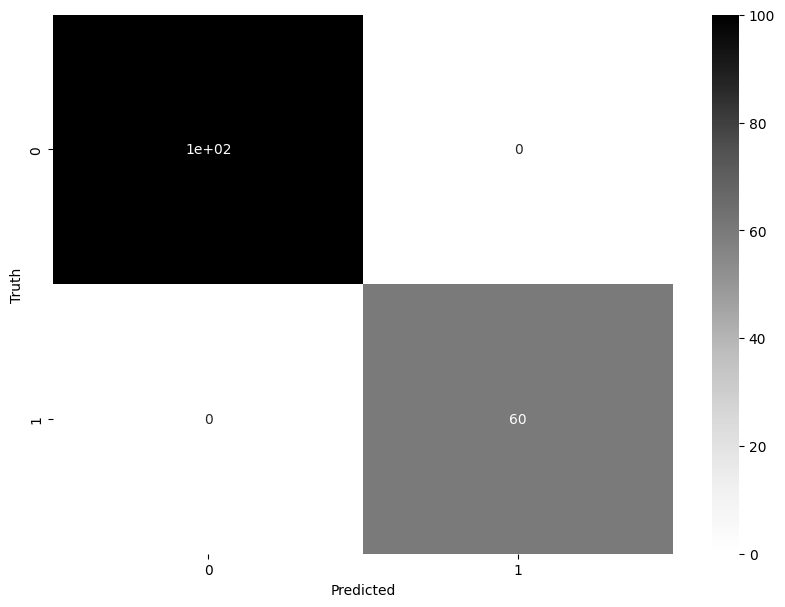

In [76]:
# run decision tree
dt = DecisionTreeClassifier()
run_model(dt, X_train, y_train, X_test, y_test)

Model: SVC()
Accuracy: 1.0

Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00        60

    accuracy                           1.00       160
   macro avg       1.00      1.00      1.00       160
weighted avg       1.00      1.00      1.00       160




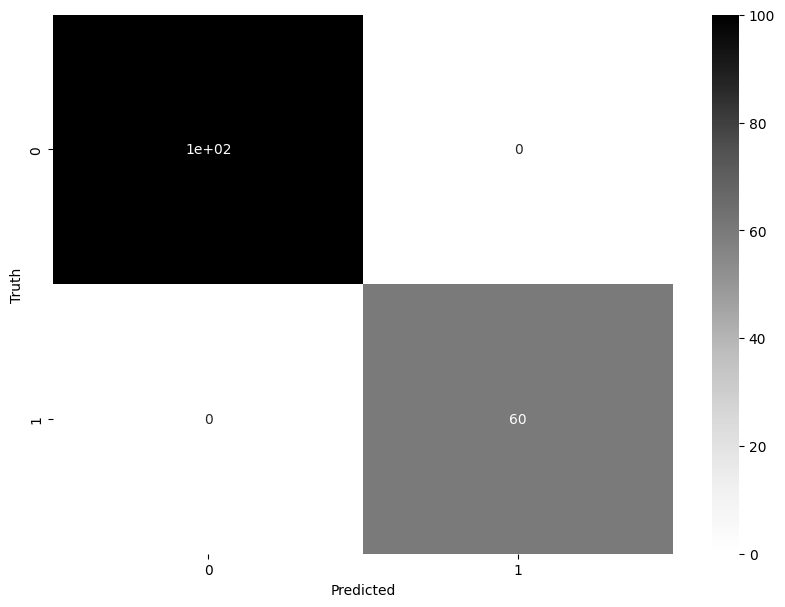

In [77]:
# run support vector machine
svm = SVC()
run_model(svm, X_train, y_train, X_test, y_test)

Model: KNeighborsClassifier()
Accuracy: 0.99375

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.99      0.99       100
           1       0.98      1.00      0.99        60

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160




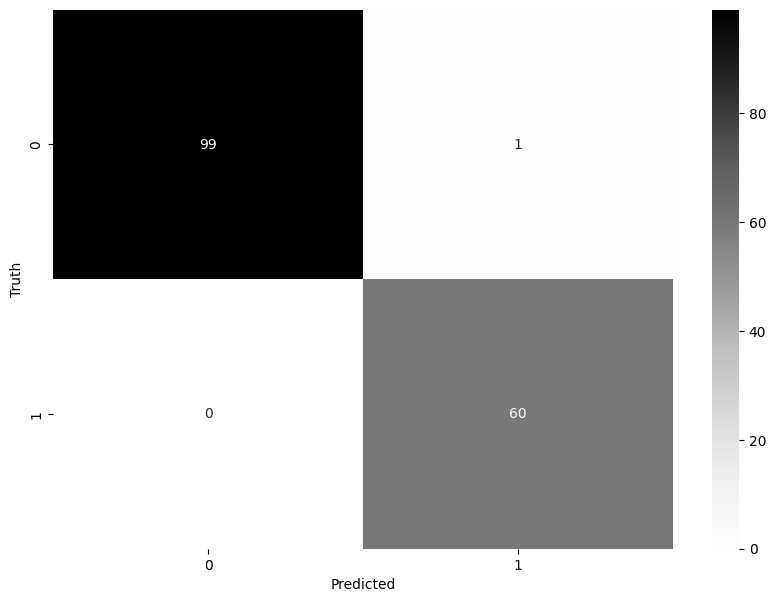

In [78]:
# run k-nearest neighbors
knn = KNeighborsClassifier()
run_model(knn, X_train, y_train, X_test, y_test)

Model: GaussianNB()
Accuracy: 0.94375

Classification Report:               precision    recall  f1-score   support

           0       1.00      0.91      0.95       100
           1       0.87      1.00      0.93        60

    accuracy                           0.94       160
   macro avg       0.93      0.96      0.94       160
weighted avg       0.95      0.94      0.94       160




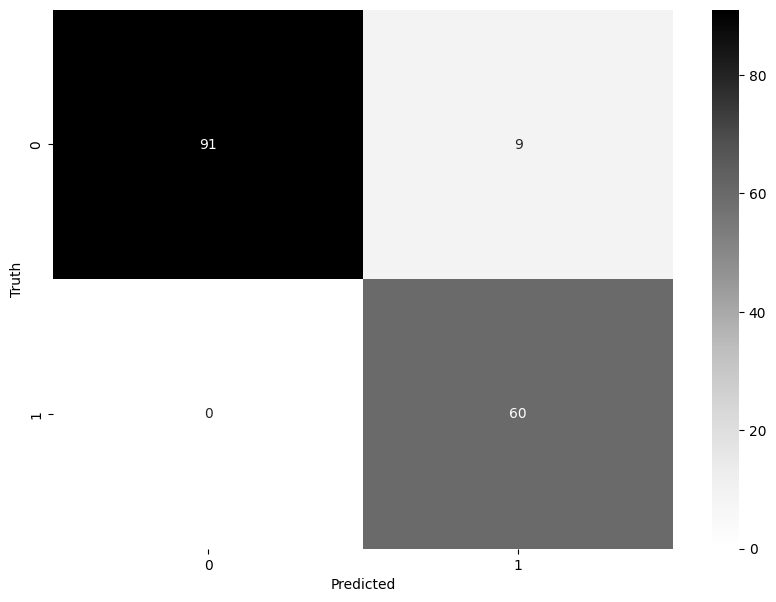

In [79]:
# naive bayes
nb = GaussianNB()
run_model(nb, X_train, y_train, X_test, y_test)